### The Leading Edge - Geophysical Tutorial (TLE April 2017)
# Having fun with electromagnetic modeling

Dieter Werthmüller

*This Jupyter Notebook accompanies the Geophysical Tutorial from The Leading Edge April 2017 edition, entitled *<**TODO: Enter final title**>*. You can play with all of the examples in this tutorial yourself in the notebook and data at https://github.com/seg. Please refer to the tutorial in the February 2016 issue for help getting started.*


## Electromagnetic modelling

Why 1D modelling (speed, isolated effects);
Describe existing, available codes with their advantages and limitations


### `empymod`
Describe the code; fht/qwe and fht/qwe/fftlog; arbitrary rotade source and receiver with length and source moment; low to high frequencies $\rho_h, \lambda, \mu_h, \mu_v, \epsilon_h, \epsilon_v$. Describe what it all can do, but to what we limit in this tutorial

Main idea is to show how easy you can get started with modelling CSEM data.

There are many ways to get `empymod`. You can install the latest stable version with `conda`

    conda install -c prisae empymod
    
or with `pip`

    pip install empymod
    
Alternatively, you can get the code from https://github.com/prisae/empymod and install it via

    python setup.py install

or simply put it in your working directory or Python-PATH to use it without installation at all.

The documentation is hostet on http://empymod.readthedocs.io.

Minimum requirement is Python 3.4 or higher, and `NumPy` and `SciPy` (I recommend the [Anaconda Python Distribution](https://www.continuum.io/downloads)).



*Last but not least, if you are interested in this please get involved! I am open for suggestions and pull requests, thankful for bug reports, and happy if I see that you fork it and create something awesome of your own.*


Notes: The previous 19 Tutorials had (in the article, not the notebook):
- 0-33 lines of code
- 2-4 pages
- 0-4 equations
- 1-6 figures
- 0-3 tables

Matt suggests ~1500 words

In [1]:
# NumPy for array-creation
import numpy as np

# Plot settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline
%matplotlib notebook

# empymod
from empymod import bipole

## 0. Simple example

A basic CSEM example: An x-directed source with x-directed inline receivers, for a 5-layer model (air, water, overburden, target, underburden), with and without hydrocarbons.

We calculate first for one frequency and many offsets, and then for many frequencies and one offsets. We could, however, also calculate for many offsets and many frequencies in one go.

<IPython.core.display.Javascript object>


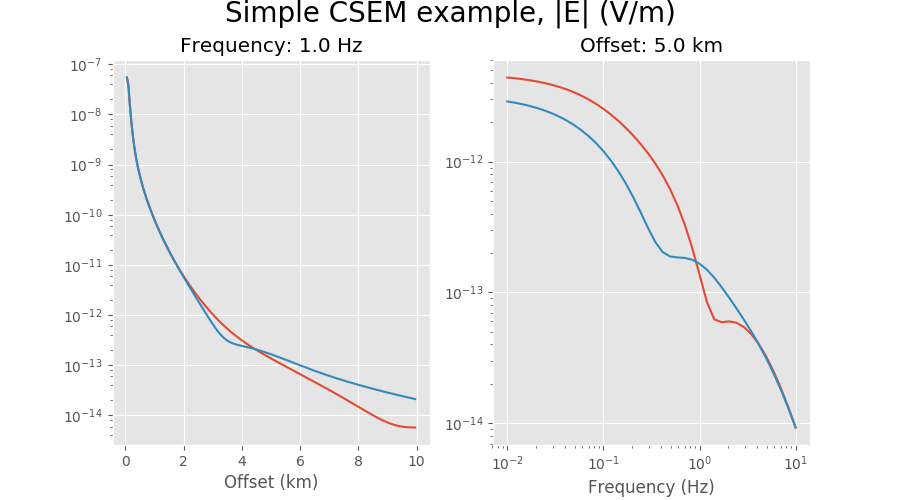

In [2]:
# Source and receiver dipoles are defined as: [x, y, z, azimuth, angle]
src = [0, 0, 150, 0, 0]
rec = [np.arange(200)*50, np.zeros(200), 200, 0, 0]

# Depth: all layer interfaces, without +/-infinity
depth = [0, 200, 1000, 1200]

# All model parameters have size(depth)+1 elements
oil = [1e20, 0.3, 1, 1, 1]
brine = [1e20, 0.3, 1, 50, 1]
aniso = [1, 1, 1.5, 2, 1]

# Frequencies
freq = np.logspace(-2, 1, 40)

# Case 1: Many offsets, 1 frequency
ofreq = freq[26]
nooil_off = bipole(src, rec, depth, brine, ofreq, aniso=aniso, verb=0)
withoil_off = bipole(src, rec, depth, oil, ofreq, aniso=aniso, verb=0)

# Case 2: Many frequencies, 1 offset
ioff = 100
frec = [rec[0][ioff], rec[1][ioff], rec[2], rec[3], rec[4]]
nooil_freq = bipole(src, frec, depth, brine, freq, aniso=aniso, verb=0)
withoil_freq = bipole(src, frec, depth, oil, freq, aniso=aniso, verb=0)

# Create figure
plt.figure(figsize=(9, 5), num='0. Simple example')
plt.suptitle('Simple CSEM example, |E| (V/m)', fontsize=20, y=1.0)
# Plot Amplitude versus Offset
plt.subplot(121)
plt.title('Frequency: '+str(ofreq)+' Hz')
plt.semilogy(rec[0]/1000, np.abs(nooil_off))
plt.semilogy(rec[0]/1000, np.abs(withoil_off))
plt.xlabel('Offset (km)')

# Plot Amplitude versus Frequency
plt.subplot(122)
plt.title('Offset: '+str(frec[0][0]/1000)+' km')
plt.loglog(freq, np.abs(nooil_freq))
plt.loglog(freq, np.abs(withoil_freq))
plt.xlabel('Frequency (Hz)')
plt.show()

As easy as that. Next we have a look at the difference between a dipole and a bipole.


## 1. Bipole versus dipole
The modeler `empymod` can handle bipole sources and receivers of arbitrary length and direction. I have a memory of a rule of thumb that says that if your offset is more than 5 times the dipole length you can model it as a dipole. Cannot remember where I got that rule from, but we check it with an the above example. Why bother? Much faster!

<IPython.core.display.Javascript object>


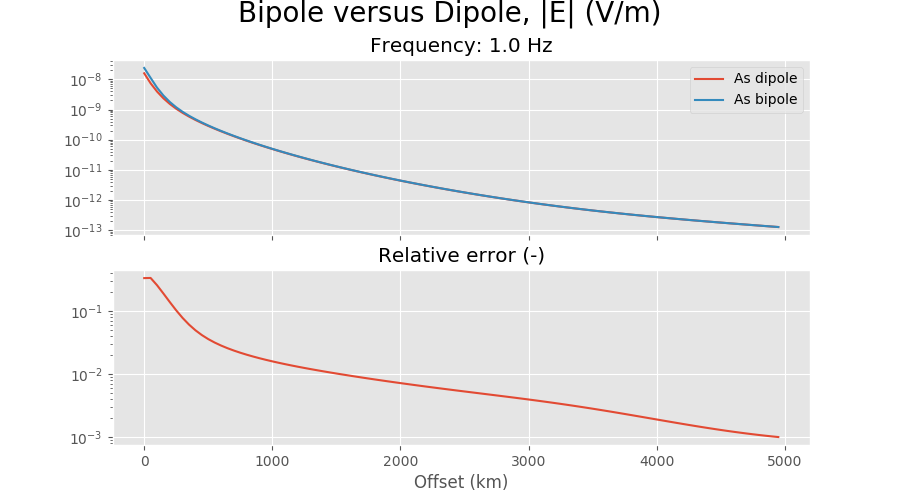

In [3]:
# Source and receiver bipoles are defined as: [x1, x2, y1, y2, z1, z2]
src = [-250,-50, 0, 0, 150, 150]

# We just take the first have of the receivers, as the difference is at near offsets
trec = [rec[0][:100], rec[1][:100], rec[2], rec[3], rec[4]]

# Case 1: Many offsets, 1 frequency
ofreq = freq[26]
asdipole = bipole(src, trec, depth, brine, ofreq, aniso=aniso, srcpts=1, verb=0)
asbipole = bipole(src, trec, depth, brine, ofreq, aniso=aniso, srcpts=10, verb=0)

# Create figure
plt.figure(figsize=(9, 5), num='1. Bipole versus dipole')
plt.suptitle('Bipole versus Dipole, |E| (V/m)', fontsize=20, y=1.0)

# Plot Amplitude versus Offset
plt.subplot(211)
plt.title('Frequency: '+str(ofreq)+' Hz')
plt.semilogy(trec[0]/1000, np.abs(asdipole), label='As dipole')
plt.semilogy(trec[0]/1000, np.abs(asbipole), label='As bipole')
plt.gca().set_xticklabels([])
plt.legend()

# Plot Amplitude versus Frequency
plt.subplot(212)
plt.title('Relative error (-)')
plt.semilogy(trec[0], np.abs(np.abs(asdipole)-np.abs(asbipole))/np.abs(asbipole))
plt.xlabel('Offset (km)')
plt.show()

## 2. Amplitude and phase of entire xy-plane

E.g. like in Hunziker et al, 2015

## 3. NAR

E.g. Hesthammer and Stefatos, 2010, figure 1

Offset vs normalized amplitud: NMVO (normalized magnitude vs offset); NAR: Normalised anomalous amplitude; for the fundamental frequency

## 4. Frequency-offset crossplot

## 5. Frequency versus time

## 6. Anisotropy
Pitfall: ...with anisotropy x... => what anisotropy?

What type of anisotropy?
$$
\lambda = \sqrt{\frac{\rho_v}{\rho_h}}\ , \qquad \text{and} \qquad \rho_m = \sqrt{\rho_v\rho_h}
$$

$$
\lambda\rho_h = \rho_m = \frac{1}{\lambda}\rho_v
$$

Werthmüller, 2009 and presented in e.g. Hobbs et al, 2009

## 7. Common-source gather

E.g. Ziolkowski et al, 2011, figures 9 and 10.


## 8. Interactive modeling

Jupyter and the ipywidgets make it incredibly easy to create interactive plots, which we use here to create an interactive model for `empymod`. All we need to do is load the widgets, define our desired sliders, create a plot function as we have done before, and subsequently call `interact`.

We define in this example three sliders:
   1. Resistivity of the target layer (Ohm m)
   2. Thickness of the target layer (m)
   3. Absolute depth from sea surface to the top of the target layer (m) 

In [17]:
from ipywidgets import FloatSlider, interact
w_res = FloatSlider(min=0.1, max=100.0, step=0.1, value=50, continuous_update=False)  # Target resistivity
w_thi = FloatSlider(min=10, max=500, step=10, value=200, continuous_update=False)     # Target thickness
w_dep = FloatSlider(min=350, max=3000, step=50, value=600, continuous_update=False)   # Target depth

We keep all the other parameters fixed:

In [18]:
# Acquisition parameters
freq = 0.5                                       # Frequency (Hz)
off = np.arange(1, 201)*50                       # Offsets (m)
src = [0, 0, 250, 0, 0]                          # Source dipole: [x=0, y=0, z=250, azimuth=0, dip=0]
rec =  [off, np.zeros(off.shape), 300, 0, 0]     # Receivers at x=off, y=0, z=300; azimuth=0, dip=0

# Background model
bg_dep = [0, 300]        # Air/Water interface at 0 m, water depth 300 m
bg_res = [1e12, 0.3, 1]  # Background of 1 Ohm m

Now we define the plotting routine which we will call afterwards with `interact`:

               :: Adquisition and background parameters ::

:: empymod START  ::

   depth       [m] :  0 300
   res     [Ohm.m] :  1E+12 0.3 1
   aniso       [-] :  1 1 1
   epermH      [-] :  1 1 1
   epermV      [-] :  1 1 1
   mpermH      [-] :  1 1 1
   mpermV      [-] :  1 1 1
   Hankel          :  Fast Hankel Transform
     > Filter      :  Key 401 (2009)
   Hankel Opt.     :  Use spline
     > pts/dec     :  Defined by filter (lagged)
   Loop over       :  Frequencies
   Source(s)       :  1 dipole(s)
     > x       [m] :  0
     > y       [m] :  0
     > z       [m] :  250
     > azimuth [°] :  0
     > dip     [°] :  0
   Receiver(s)     :  200 dipole(s)
     > x       [m] :  50 - 10000 : 200  [min-max; #]
     > y       [m] :  0 - 0 : 200  [min-max; #]
     > z       [m] :  300
     > azimuth [°] :  0
     > dip     [°] :  0
   Required ab's   :  11

:: empymod END; runtime = 0:00:00.012129 :: 1 kernel call(s)



<IPython.core.display.Javascript object>


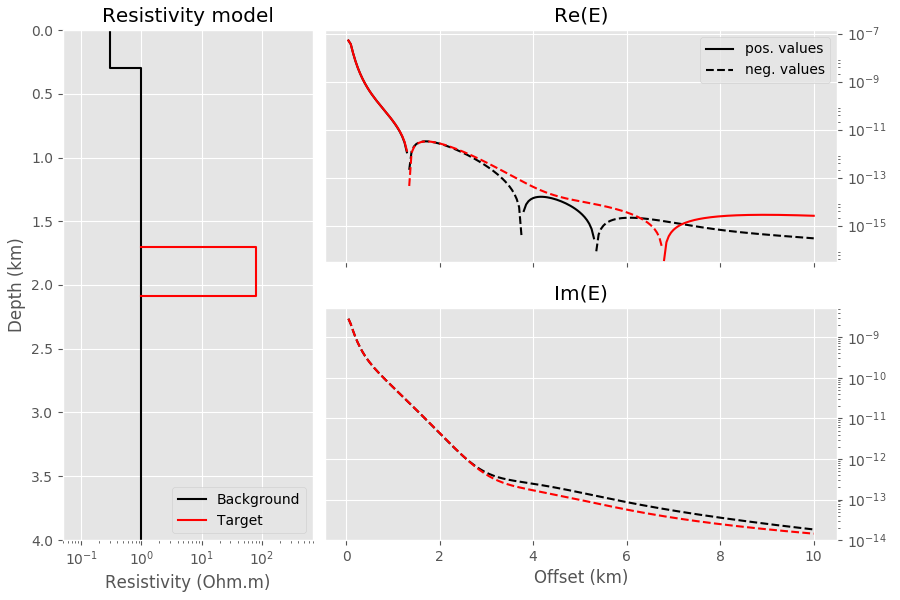

In [19]:
# 1. Calculate background response; print model parameters
print('               :: Adquisition and background parameters ::')
bg_em = bipole(src, rec, bg_dep, bg_res, freq, opt='spline', verb=3)

# 2. Create figure
fig = plt.figure(figsize=(9, 6), num='Interactive modeling with empymod')

# 2.a Plot resistivity model; initialize target with background
ax1 = plt.subplot2grid((2, 3), (0, 0), rowspan=2)
plt.subplots_adjust(left=0.07, right=.93, bottom=0.1, top=.95, wspace=.05)
ax1.set_title('Resistivity model')
bgres = np.r_[bg_res[1], bg_res[1:], bg_res[2]]
bgdep = np.r_[bg_dep, bg_dep[1], 4000]/1000
ax1.plot(bgres, bgdep, 'k', label='Background')
ax1.plot(bgres, bgdep, 'r', label='Target')
ax1.set_xscale('log')
ax1.set_xlim([.05, 700])
ax1.set_ylim([4, 0])
ax1.legend(loc=4)
ax1.set_ylabel('Depth (km)')
ax1.set_xlabel('Resistivity (Ohm.m)')

# 2.b Plot real part; initialize target with background
ax2 = plt.subplot2grid((2, 3), (0, 1), colspan=2)
ax2.semilogy(off/1000, np.where(bg_em.real >= 0, bg_em.real, np.nan), 'k', label='pos. values')
ax2.semilogy(off/1000, np.where(bg_em.real < 0, -bg_em.real, np.nan), 'k--', label='neg. values')
ax2.semilogy(off/1000, np.where(bg_em.real >= 0, bg_em.real, np.nan), 'r')
ax2.semilogy(off/1000, np.where(bg_em.real < 0, -bg_em.real, np.nan), 'r--')
ax2.set_title('Re(E)')
ax2.set_xticklabels([])
ax2.yaxis.tick_right()
ax2.legend()

# 2.c Plot imaginary part; initialize target with background
ax3 = plt.subplot2grid((2, 3), (1, 1), colspan=2)
ax3.semilogy(off/1000, np.where(bg_em.imag >= 0, bg_em.imag, np.nan), 'k')
ax3.semilogy(off/1000, np.where(bg_em.imag < 0, -bg_em.imag, np.nan), 'k--')
ax3.semilogy(off/1000, np.where(bg_em.imag >= 0, bg_em.imag, np.nan), 'r')
ax3.semilogy(off/1000, np.where(bg_em.imag < 0, -bg_em.imag, np.nan), 'r--')
ax3.set_title('Im(E)')
ax3.set_xlabel('Offset (km)')
ax3.yaxis.tick_right()

# 3. Define function in which we update the target response
def calc_em(resistivity, thickness, abs_depth):
    # Update target depth and resistivity with input
    tg_dep = np.r_[bg_dep, abs_depth, abs_depth + thickness]
    tg_res = np.r_[bg_res, resistivity, bg_res[2]]
    
    # Re-calculate the response
    tg_em = bipole(src,rec, tg_dep, tg_res, freq, opt='spline', verb=0)

    # Update model and response in plot
    ax1.lines[1].set_xdata([bg_res[2], resistivity, resistivity, bg_res[2]])
    ax1.lines[1].set_ydata(np.r_[abs_depth, abs_depth, abs_depth + thickness, abs_depth + thickness]/1000)
    ax2.lines[2].set_ydata(np.where(tg_em.real >= 0, tg_em.real, np.nan))
    ax2.lines[3].set_ydata(np.where(tg_em.real < 0, -tg_em.real, np.nan))
    ax3.lines[2].set_ydata(np.where(tg_em.imag >= 0, tg_em.imag, np.nan))
    ax3.lines[3].set_ydata(np.where(tg_em.imag < 0, -tg_em.imag, np.nan))

In [27]:
fwgt = interact(calc_em, resistivity=w_res, thickness=w_thi, abs_depth=w_dep)

## References

**Anderson, W. L., 1979**, Numerical integration of related Hankel transforms of orders 0 and 1 by adaptive digital filtering: Geophysics, 44, 1287-1305.  
DOI: [10.1190/1.1441007](http://dx.doi.org/10.1190/1.1441007)

**Hamilton, A. J. S., 2000**, Uncorrelated modes of the non-linear power spectrum: Monthly Notices of the Royal Astronomical Society, 312, pages 257-284.  
DOI: [10.1046/j.1365-8711.2000.03071.x](http://dx.doi.org/10.1046/j.1365-8711.2000.03071.x)  
Software: [casa.colorado.edu/~ajsh/FFTLog](http://casa.colorado.edu/~ajsh/FFTLog)

**Hesthammer, J., and A. Stefatos, 2010** ,The performance of CSEM as a de‐risking tool in oil and gas exploration: SEG Technical Program Expanded Abstracts, 675-679.  
DOI: [10.1190/1.3513873](http://dx.doi.org/10.1190/1.3513873)


**Hobbs, B. A., D. Werthmüller, and F. Engelmark, 2009**, Apparent anisotropy derived from transient electromagnetic earth responses: SEG Technical Program Expanded Abstracts, 744-748.  
DOI: [10.1190/1.3255861](http://dx.doi.org/10.1190/1.3255861)

**Hunziker, J., J. Thorbecke, and E. Slob, 2015**, The electromagnetic response in a layered vertical transverse isotropic medium: A new look at an old problem: Geophysics, 80, F1-F18.  
DOI: [10.1190/geo2013-0411.1](http://dx.doi.org/10.1190/geo2013-0411.1)  
Software: [software.seg.org/2015/0001](http://software.seg.org/2015/0001)
   
**Key, K., 2009**, 1D inversion of multicomponent, multifrequency marine CSEM data: Methodology and synthetic studies for resolving thin resistive layers: Geophysics, 74, F9-F20.  
DOI: [10.1190/1.3058434](http://dx.doi.org/10.1190/1.3058434)  
Software: [marineemlab.ucsd.edu/Projects/Occam/1DCSEM](http://marineemlab.ucsd.edu/Projects/Occam/1DCSEM)

**Key, K., and J. Ovall, 2011**, A parallel goal-oriented adaptive finite element method for 2.5-D electromagnetic modelling: Geophysical Journal International, 186, 137-154.  
DOI: [10.1111/j.1365-246X.2011.05025.x](http://dx.doi.org/10.1111/j.1365-246X.2011.05025.x)  
Software: [mare2dem.ucsd.edu](http://mare2dem.ucsd.edu)

**Key, K., 2012**, Is the fast Hankel transform faster than quadrature?: Geophysics, 77, F21-F30.  
DOI: [10.1190/GEO2011-0237.1](http://dx.doi.org/10.1190/GEO2011-0237.1)  
Software: [software.seg.org/2012/0003](http://software.seg.org/2012/0003)

**Werthmüller, D., 2009**, Inversion of Multi-Transient EM data from anisotropic media: M.Sc. Thesis.  
UUID: [f4b071c1-8e55-4ec5-86c6-a2d54c3eda5a](http://repository.tudelft.nl/view/ir/uuid:f4b071c1-8e55-4ec5-86c6-a2d54c3eda5a)

**Ziolkowski, A., D. Wright, and J. Mattsson, 2011**, Comparison of pseudo-random binary sequence and square-wave transient controlled-source electromagnetic data over the Peon gas discovery, Norway: Geophysical Prospecting, 59, 1114-1131.  
DOI: [10.1111/j.1365-2478.2011.01006.x](http://dx.doi.org/10.1111/j.1365-2478.2011.01006.x)
